In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import plotly.express as px
import requests
from semanticscholar import SemanticScholar

from paper_analysis import semantic_scholar as s2

In [2]:
paper_id = s2.get_id_from_url(
    "https://www.semanticscholar.org/paper/Mapping-poverty-at-multiple-geographical-scales-Nicolò-Fabrizi/f24dc845602d5b395b3c33697e6edcf29ad5776a"
)

In [3]:
paper = s2.get_paper_from_id(paper_id=paper_id)

In [2]:
sch = SemanticScholar()
paper = sch.get_paper("f24dc845602d5b395b3c33697e6edcf29ad5776a")
paper.title

'Mapping poverty at multiple geographical scales'

In [4]:
def get_references(references: list) -> list:
    data = []
    for ref in references:
        if ref["publicationVenue"]:
            if ref["publicationVenue"]["type"]:
                publication_venue_type = ref["publicationVenue"]["type"]
        else:
            publication_venue_type = None
        data.append(
            (
                ref["paperId"],
                ref["title"],
                ref["url"],
                ref["publicationDate"],
                ref["venue"],
                publication_venue_type,
                ref["referenceCount"],
                ref["citationCount"],
            )
        )
    return data


print([k for k in paper.references[0].keys()])
data = get_references(paper.references)
df = pd.DataFrame(
    data,
    columns=[
        "paperId",
        "title",
        "url",
        "publicationDate",
        "venue",
        "publication_venue_type",
        "referenceCount",
        "citationCount",
    ],
)
df.citationCount = df.citationCount.fillna(0)
df["binning"] = pd.qcut(df.citationCount, 8, labels=False)
df["binning"] = df["binning"] + 1
# df['binning'] = pd.cut(df.citationCount, bins=4, labels=False)
df.head()

['paperId', 'externalIds', 'corpusId', 'publicationVenue', 'url', 'title', 'abstract', 'venue', 'year', 'referenceCount', 'citationCount', 'influentialCitationCount', 'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes', 'publicationDate', 'journal', 'citationStyles', 'authors']


,paperId,title,url,publicationDate,venue,publication_venue_type,referenceCount,citationCount,binning
0,90405063133184d0ad29b426feb490ece0ce83b9,A review of machine learning and satellite ima...,https://www.semanticscholar.org/paper/90405063...,2023-02-01,Journal of International Development,journal,37.0,2.0,1
1,830d29d57e9c54bff7803aa52b00dc56535b4470,Multivariate mixture model for small area esti...,https://www.semanticscholar.org/paper/830d29d5...,2022-12-01,Journal of the Royal Statistical Society: Seri...,None,27.0,1.0,1
2,d253b41297e7ec43cec7f02401196125188e0824,Guidelines to Small Area Estimation for Povert...,https://www.semanticscholar.org/paper/d253b412...,2022-06-16,,None,0.0,2.0,1
3,2c36a2514c98f47483a40c5152b337a2bc4450c0,A Computationally Efficient Approach to Fully ...,https://www.semanticscholar.org/paper/2c36a251...,2022-03-23,,None,0.0,1.0,1
4,3bba63cd7b14cdcd458a4fa6be8c78d2582cd65c,Accounting for survey design in Bayesian disag...,https://www.semanticscholar.org/paper/3bba63cd...,2021-12-13,Annals of Applied Statistics,journal,51.0,2.0,1


In [27]:
len(df.venue.unique())

28

In [30]:
fig = px.scatter(
    df,
    x="publicationDate",
    y="venue",
    # size="binning",
    size="citationCount",
    size_max=60,
    # size_min=20,
    color="citationCount",
    # marginal_x="histogram",
    title=f"Paper: {paper.title} ({paper.year})",
    hover_data=["title", "referenceCount", "citationCount"],
    # width=1000,
    height=int(25 * len(df.venue.unique())),
    # height=700,
)

fig.layout.yaxis.type = "category"
fig.update_yaxes(dtick=1)
fig.show()

<Axes: >

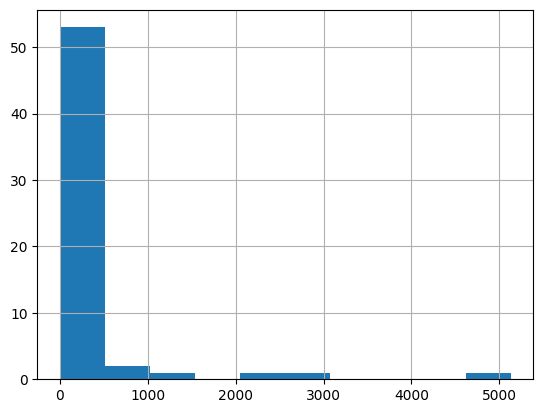

In [96]:
df["citationCount"].hist()

In [49]:
[x for x in paper.keys()]

['paperId',
 'externalIds',
 'corpusId',
 'publicationVenue',
 'url',
 'title',
 'abstract',
 'venue',
 'year',
 'referenceCount',
 'citationCount',
 'influentialCitationCount',
 'isOpenAccess',
 'openAccessPdf',
 'fieldsOfStudy',
 's2FieldsOfStudy',
 'embedding',
 'tldr',
 'publicationTypes',
 'publicationDate',
 'journal',
 'authors',
 'citations',
 'references']

In [31]:
"""
<sha> - a Semantic Scholar ID, e.g. 649def34f8be52c8b66281af98ae884c09aef38b
* CorpusId:<id> - a Semantic Scholar numerical ID, e.g. 215416146
* DOI:<doi> - a Digital Object Identifier, e.g. DOI:10.18653/v1/N18-3011
* ARXIV:<id> - arXiv.rg, e.g. ARXIV:2106.15928
* MAG:<id> - Microsoft Academic Graph, e.g. MAG:112218234
* ACL:<id> - Association for Computational Linguistics, e.g. ACL:W12-3903
* PMID:<id> - PubMed/Medline, e.g. PMID:19872477
* PMCID:<id> - PubMed Central, e.g. PMCID:2323736
* URL:<url> - URL from one of the sites listed below, e.g. URL:https://arxiv.org/abs/2106.15928v1

URLs are recognized from the following sites:
* semanticscholar.org
* arxiv.org
* aclweb.org
* acm.org
* biorxiv.org
"""
url_search = "https://api.semanticscholar.org/graph/v1/paper/search"

In [2]:
paper_url = "https://arxiv.org/abs/2305.19513"
endpoint = "https://api.semanticscholar.org/graph/v1/paper/"
url = endpoint + "URL:" + paper_url
print(url)

https://api.semanticscholar.org/graph/v1/paper/URL:https://arxiv.org/abs/2305.19513


In [3]:
SUPPORTED_WEBSITE_URL = [
    "semanticscholar.org",
    "arxiv.org",
    "aclweb.org",
    "acm.org",
    "biorxiv.org",
]


def generate_url(input_str: str) -> str:
    endpoint = "https://api.semanticscholar.org/graph/v1/paper/"
    if any([x for x in SUPPORTED_WEBSITE_URL if x in input_str]):
        return endpoint + "URL:" + paper_url
    else:
        print(f"Paper {paper_url} not found")


def get_paper_id(paper_url: str):
    s2_url = generate_url(paper_url)
    print(s2_url)
    response = requests.get(s2_url)
    return response.json()["paperId"]

In [4]:
paper_id = get_paper_id(paper_url)

https://api.semanticscholar.org/graph/v1/paper/URL:https://arxiv.org/abs/2305.19513


In [5]:
paper = s2.get_paper_from_id(paper_id=paper_id)
df_references = s2.get_references_df(paper.references)
df_references
# fig = plot_references_timeline(df_references)
# fig.show()

,paperId,title,url,publicationDate,venue,publication_venue_type,referenceCount,citationCount,binning
0,0852c7c5cb5583592229401e96de073ae6672d4d,Transition Is a Process: Pair-to-Video Change ...,https://www.semanticscholar.org/paper/0852c7c5...,2022-12-07,IEEE Transactions on Image Processing,journal,55.0,5.0,1
1,ae418d9dead998baefe759fb634c8ba446bb9a5e,Adaptive Contourlet Fusion Clustering for SAR ...,https://www.semanticscholar.org/paper/ae418d9d...,2022-03-04,IEEE Transactions on Image Processing,journal,0.0,9.0,1
2,fe0e69189c0739b8b7a9dc17995776d67878ebec,Structured graph based image regression for un...,https://www.semanticscholar.org/paper/fe0e6918...,2022-03-01,Isprs Journal of Photogrammetry and Remote Sen...,journal,58.0,11.0,2
3,a45d5828be284bb2152b668f451044305ffff8fa,Deep Learning-Based Change Detection in Remote...,https://www.semanticscholar.org/paper/a45d5828...,2022-02-11,Remote Sensing,journal,197.0,51.0,4
4,55b683296286725ce9a55c42739be833f00afd16,ChangeMask: Deep multi-task encoder-transforme...,https://www.semanticscholar.org/paper/55b68329...,2022-01-01,Isprs Journal of Photogrammetry and Remote Sen...,journal,28.0,32.0,3
...,...,...,...,...,...,...,...,...,...
63,753606373f25a508771edca33a9a8d37c128d27f,Sparse-Constrained Adaptive Structure Consiste...,https://www.semanticscholar.org/paper/75360637...,None,IEEE Transactions on Geoscience and Remote Sen...,journal,41.0,18.0,2
64,e78359fb85f5fc0749ac02237d49c08a59e54923,Difference Enhancement and Spatial-Spectral No...,https://www.semanticscholar.org/paper/e78359fb...,None,IEEE Transactions on Geoscience and Remote Sen...,journal,0.0,21.0,2
65,None,Difficultyaware attention network with confide...,None,None,"AAAI Conference on Artificial Intelligence, vo...",None,NaN,0.0,1
66,a847f9233848cd4b3c2de6cdc6c22f2e6f8f8c7a,Digital change detection in forest ecosystems ...,https://www.semanticscholar.org/paper/a847f923...,None,,None,72.0,676.0,7


In [6]:
paper

{'paperId': '2060c4cf8ccb4778801dd6af9e0f2a6dc36cec81', 'externalIds': {'ArXiv': '2305.19513', 'DBLP': 'journals/corr/abs-2305-19513', 'DOI': '10.48550/arXiv.2305.19513', 'CorpusId': 258987696}, 'corpusId': 258987696, 'publicationVenue': {'id': '1901e811-ee72-4b20-8f7e-de08cd395a10', 'name': 'arXiv.org', 'alternate_names': ['ArXiv'], 'issn': '2331-8422', 'url': 'http://bibpurl.oclc.org/web/7130'}, 'url': 'https://www.semanticscholar.org/paper/2060c4cf8ccb4778801dd6af9e0f2a6dc36cec81', 'title': 'Towards Accurate and Reliable Change Detection of Remote Sensing Images via Knowledge Review and Online Uncertainty Estimation', 'abstract': 'Change detection (CD) is an essential task for various real-world applications, such as urban management and disaster assessment. However, previous methods primarily focus on improving the accuracy of CD, while neglecting the reliability of detection results. In this paper, we propose a novel change detection network, called AR-CDNet, which is able to prov